# BOSTON HOUSING PROJECT

### The steps involved in solving machine learning problems are:
    1. Data Preprocessing
    2. Defining "Error"
    3. Spliting data in two parts: Training Set and Testing Set
    4. Training Model: This step involves "learning" the target function from the given training
       data. We need to choose the appropriate machine learning problem. Then train it on the
       data. And finally, testing the model with the testing data.
    5. Prediction: Obtain the predicted values for the given input and visualize the results.

### Importing Essential Libraries

In [ ]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from sklearn.datasets import load_boston # sklearn -> Scikit Learn Library whcih contains ML Models.
from sklearn.metrics import mean_squared_error #MSE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML

## Step 1: Data Preprocessing

### Some Keywords related to Boston Housing dataset:
1. data: Contains the information for various houses.
2. target: Prices of the houses.
3. feature_names: names of the features.
4. DESCR: describes the dataset.

### Loading Dataset

In [ ]:
#from google.colab import files
#files.upload()


In [ ]:
#%pwd

In [ ]:
#%ls

In [ ]:
#Boston = pd.read_csv('Boston.csv')

In [ ]:
# Here we are loading the Boston Hounsing dataset already present in scikit-learn library
# 'boston' below is the object for the class load_boston.
boston = load_boston()

# Description of the dataset
# This tells about the essential informations about dataset. We can find this as housing.names on UCI website.
print(boston.DESCR)


In [ ]:
# Put the data into pandas DataFrame
# 'features' below are the initial 13 columns of our dataset.
features = pd.DataFrame(boston.data, columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
# 'target' below is the 14 column (named 'MEDV') of our dataset which contains
# the price of houses depending on the fearutes listed.
target = pd.DataFrame(boston.target, columns=['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
# Concatenate features and target into a single DataFrame.
# axis=1 makes it concatenate column wise.
df = pd.concat([features,target], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Using describe() to generate a summary of dataset
The describe() method computes the following parameter for each column
- count - Number of rows
- mean - Mean of the column
- std - Standard Deviation of the column
- min - Minimum value in the column
- max - Maximum value in the column
- 25% - 25 percentile
- 50% - 50 percentile
- 75% - 75 percentile

Percentile - A percentile (centile) is a measure used in statistics indicating the value below which a given percentage of observations in a group of observations fails.

In [ ]:
# using round(decimals=2) to set the precision to 2 decimal places.
df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


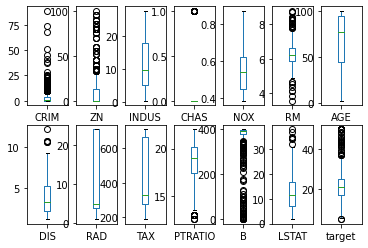

In [ ]:
## Let's create univariate plot for looking at the relations between data.
df.plot(kind='box', subplots=True, layout=(2,7), sharex=False, sharey=False)
plt.show()

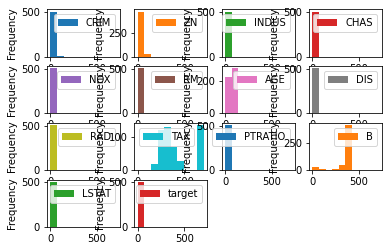

In [ ]:
# df.hist()
df.plot(kind='hist', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

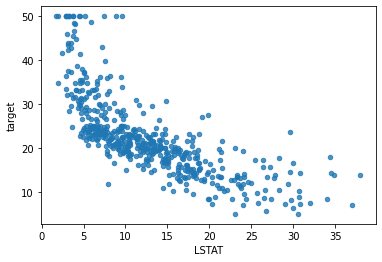

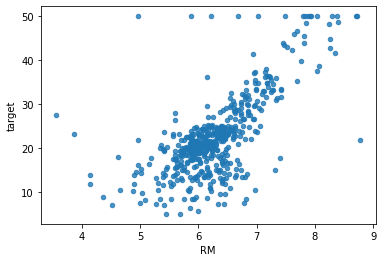

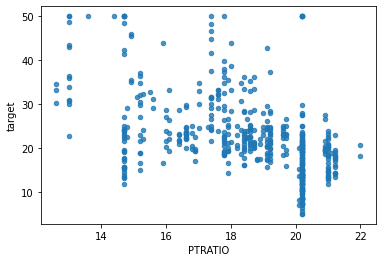

In [ ]:
# # Let's see the scattered matrix for our dataset.
# scatter_matrix(df)
# plt.show()
df.plot(kind="scatter", x="LSTAT", y="target", alpha=0.8)
df.plot(kind="scatter", x="RM", y="target", alpha=0.8)
df.plot(kind="scatter", x="PTRATIO", y="target", alpha=0.8)

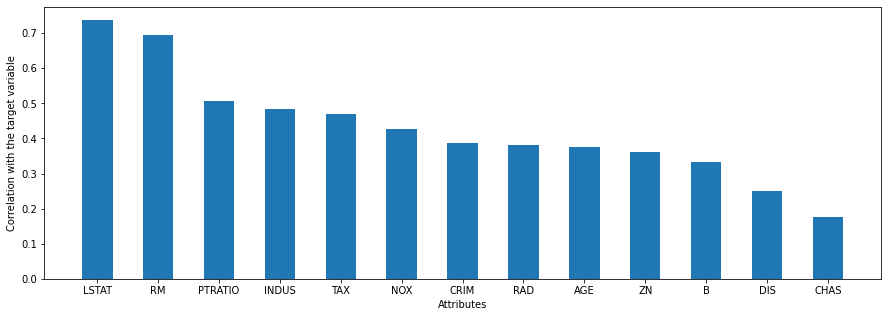

In [ ]:
# Calculate correlatioin between every column on the data
corr = df.corr('pearson')

# Take absolute values of correlation
corrs = [abs(corr[attr]['target']) for attr in list(features)]

# Make a list of pairs [(corr, feature)]
l = list(zip(corrs, list(features)))

# Sort the list of pairs in reverse/descending order,
# with the correlation value ('x[0]' here) as the key for sorting
l.sort(key= lambda x: x[0], reverse=True)

# "Unzip" pairs to two lists
# zip(*l) - takes a list that looks like [[a,b,c], [d,e,f], [g,h,i]]
# and returns [[a,d,g], [b,e,h], [c,f,i]]
corrs, labels = list(zip((*l)))

# Plot correlations with respect to the target variable as a bar graph
index = np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index, corrs, width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with the target variable')
plt.xticks(index, labels)
plt.show()

# We observe from the bar graph generated above, that LSAT & RM have the two highest absolute correlation values.

## Normalize the Data
Normalize the data with MinMaxScaler

In [ ]:
X = df['LSTAT'].values
Y = df['target'].values

In [ ]:
# creating objects of MinMaxScaler as 'x_scaler' and 'y_scaler'.
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1, 1))
X = X[:, -1]
y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1, 1))
Y = Y[:, -1]

# Step 2: Define Error

There are many ways to calculate errors like:
- MSE - Mean Square Error
- MAE - Mean Absolute Error
- CEL - Cross Entropy Loss (Used for classification methods)

Here we will be using MSE as it makes it easy to calculate gradients for linear regression models.
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (X_i^* - X_i)^2 $$

In [ ]:
def error(m, x, c, t):
    N = x.size
    e = sum(((m*x+c) - t)**2)
    return e*(1/(N))

# Step 3: Split the Data

- **Split the data into training and testing data:** The data is split before the training step and the samples in the set of data do not change during the course of the training process.
- **Cross Validation:** Split the data into equal chunks. At each step of training, choose one chunk of data as training data and other chunk as testing data.

### Splitting the data into fixed sets.

In [ ]:
# 0.2 indicates 20% of the data is randomly sampled as testing data.
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(ytrain)}\nRows in test set: {len(ytest)}\n")

Rows in train set: 404
Rows in test set: 102



## Step 4: Build the Model

In [ ]:
def update(m, x, c, t, learning_rate):
    grad_m = sum(2*((m*x + c) - t)*x)
    grad_c = sum(2*((m*x + c) - t))
    m = m-grad_m * learning_rate
    c = c-grad_c * learning_rate
    return m, c

**Error Threshold**: If the error fall below the threshold, the gradient descent process is stopped and the weights are returned

In [ ]:
def gradient_descent(init_m, init_c, x, t, learning_rate, iterations, error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m, x, c, t)
        if e < error_threshold:
            print("Error less than the threshold.\nStopping gradient descent")
            break
        error_values.append(e)
        m, c = update(m, x, c, t, learning_rate)
        # the values of m and c returned from 'update' function are larger
        # hence we have rounded them to 5 decimal places.
        m = m.round(decimals=5)
        c = c.round(decimals=5)
        mc_values.append((m,c))
    return m, c, error_values, mc_values

In [ ]:
%%time
init_m = 0.9
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001


m, c, error_values, mc_values = gradient_descent(init_m, init_c, xtrain, ytrain, learning_rate, iterations, error_threshold)

CPU times: user 70.8 ms, sys: 19 µs, total: 70.8 ms
Wall time: 72.9 ms


In [ ]:
print(len(mc_values))
print(len(error_values))

250
250


## Animation may take a minute or more to get processed.
Therefore selecting every 5th value to reduce the processing time.

In [ ]:
# As the number of iteration increases, changes in the line are less noticable.
# In order to reduce the processing time for the animation, it is advised to choose smaller values.
mc_values_anim = mc_values[::5]

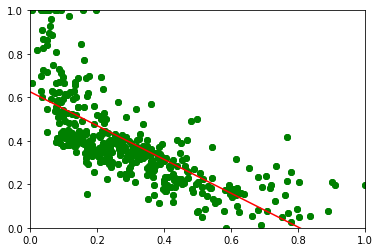

In [ ]:
fig, ax = plt.subplots()
ln, = plt.plot([],[], 'ro-', animated=True)


def init():
    plt.scatter(xtrain, ytrain, color='g')
    ax.set_xlim(0, 1.0)
    ax.set_ylim(0, 1.0)
    return ln,

def update_frame(frame):
    m, c = mc_values_anim[frame]
    x1, y1 = -0.5, m* -.5 + c
    x2, y2 = 1.5, m* 1.5 + c
    ln.set_data([x1,x2], [y1,y2])
    return ln,


anim = FuncAnimation(fig, update_frame, frames=range(len(mc_values_anim)), init_func=init, blit=True)
HTML(anim.to_html5_video())

## Visualization of the learning process

1. **Plot the regression line** against the training data set to visualize what the line looks like for the trianing dataset
2. **Plot the error values**: This graph will show how the error drops over time
3. **Plot the change in regression line through out the training process**: This graph helps to visualize how m and c values are updated after each step

### Plotting the regression line upon the training dataset

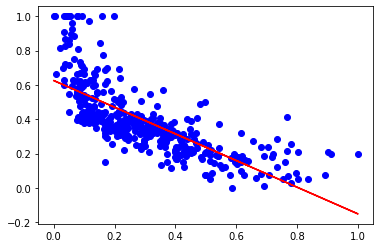

In [ ]:
plt.scatter(xtrain, ytrain, color='b')
plt.plot(xtrain, (m*xtrain+c), color='r')

### Plotting error values

Text(0.5, 0, 'Iterations')

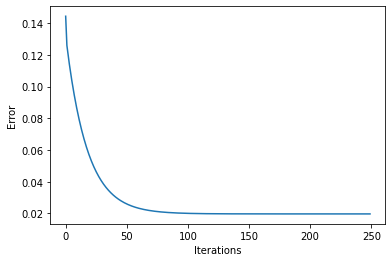

In [ ]:
plt.plot(np.arange(len(error_values)), error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')

## Step 5: Prediction

After step 4, we obtained the final values of m and c. Using these values we obtain the predictions for the values in the testing data

We will then evaluate the model with certain metrics such as RMSE, R2 Score etc. The choice of these metrics will depend on the type of data(Categorical, continous etc.)

### Now for making predictions

In [ ]:
# Calculate the predictions on the test set as a vectorized operation.
predicted = (m*xtest) + c

In [ ]:
# Compute MSE for the predicted values on the testing set.
mean_squared_error(ytest, predicted)

0.016546401494596658

In [ ]:
# Let's put xtest, ytest and predicted values into a single DataFrame so that we
# can see the predicted values alongside the testing set.
p = pd.DataFrame(list(zip(xtest, ytest, predicted)), columns=['x', 'target_y', 'predicted_y'])
p.head(10)

,x,target_y,predicted_y
0,0.201711,0.413333,0.468746
1,0.049669,0.608889,0.586901
2,0.450883,0.191111,0.275110
3,0.104581,0.395556,0.544228
4,0.428808,0.246667,0.292265
5,0.282561,0.333333,0.405916
6,0.458057,0.284444,0.269534
7,0.618929,0.200000,0.144518
8,0.307395,0.324444,0.386617
9,0.347682,0.262222,0.355309


## Plot the predicted values against the target values.
1. Predicted values are represented by the red colored lines.
2. Target values are represented by blue colored lines.

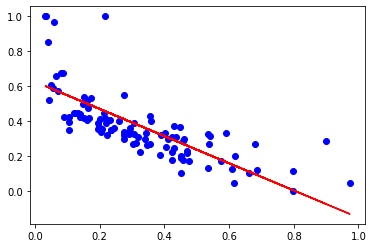

In [ ]:
plt.scatter(xtest, ytest, color='b')
plt.plot(xtest, predicted, color='r')

### Revert normalization to obtain the predicted price of the houses in <span>$1000s</span>
The predicted values are in the range 0-1. This is not very useful to us when we want to obtain the price. Here we will use inverse_transform() to scale the values back to original representation.

In [ ]:
# Reshape to change the shape that is required by the scaler
predicted = predicted.reshape(-1,1)
xtest = xtest.reshape(-1,1)
ytest = ytest.reshape(-1,1)

xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)
predicted_scaled = y_scaler.inverse_transform(predicted)

# This is to remove the extra dimension
xtest_scaled = xtest_scaled[:,-1]
ytest_scaled = ytest_scaled[:,-1]
predicted_scaled = predicted_scaled[:,-1]

p = pd.DataFrame(list(zip(xtest_scaled, ytest_scaled, predicted_scaled)), columns=['x', 'target_y', 'predicted_y'])
p = p.round(decimals=2)
p.head()

,x,target_y,predicted_y
0,9.04,23.6,26.09
1,3.53,32.4,31.41
2,18.07,13.6,17.38
3,5.52,22.8,29.49
4,17.27,16.1,18.15
